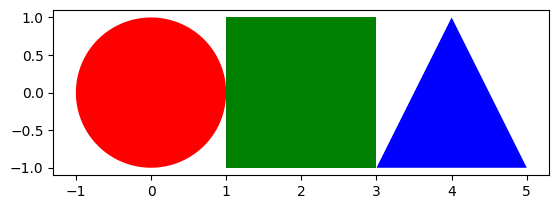

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 设置坐标系
fig, ax = plt.subplots()
ax.set_aspect('equal')

# 定义形状的尺寸和位置
x_offset = 0
shapes = ['circle', 'square', 'triangle']
sizes = [1, 1, 1]

for shape, size in zip(shapes, sizes):
    if shape == 'circle':
        theta = np.linspace(0, 2 * np.pi, 100)
        x = x_offset + size * np.cos(theta)
        y = size * np.sin(theta)
        ax.fill(x, y, 'r')
        
    elif shape == 'square':
        x = x_offset + size * np.array([-1, 1, 1, -1])
        y = size * np.array([-1, -1, 1, 1])
        ax.fill(x, y, 'g')
        
    elif shape == 'triangle':
        x = x_offset + size * np.array([-1, 1, 0])
        y = size * np.array([-1, -1, 1])
        ax.fill(x, y, 'b')
        
    # 更新 x_offset
    x_offset += 2 * size  # 2*size 以便分隔

plt.show()


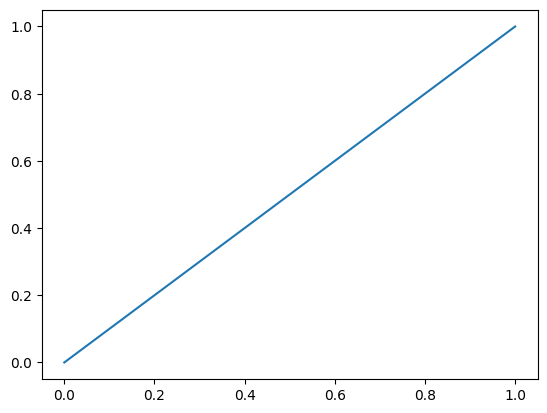

In [2]:
fig, ax = plt.subplots()
line, = ax.plot([0, 1], [0, 1])
# plt.show()

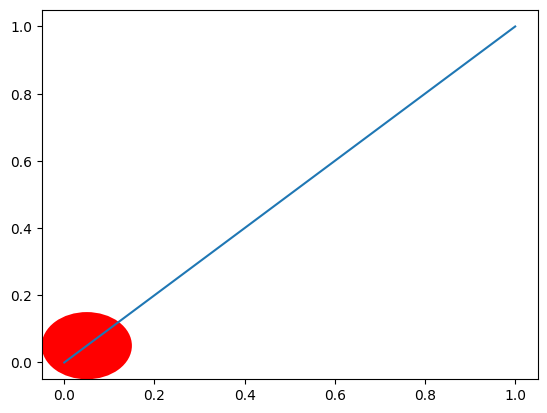

In [11]:
fig, ax = plt.subplots()
line, = ax.plot([0, 1], [0, 1])
circle = plt.Circle((0+0.05, 0+0.05), 0.1, fc='r')
# circle.set_center((0.5, 0.5))
ax.add_artist(circle)

plt.show()

In [17]:
import itertools

right_theta0 = [90, 45]

# 生成所有可能的两两组合
combinations = list(itertools.product(right_theta0, right_theta0))

# 打印所有组合
for combo in combinations:
    print(combo)


(90, 90)
(90, 45)
(45, 90)
(45, 45)


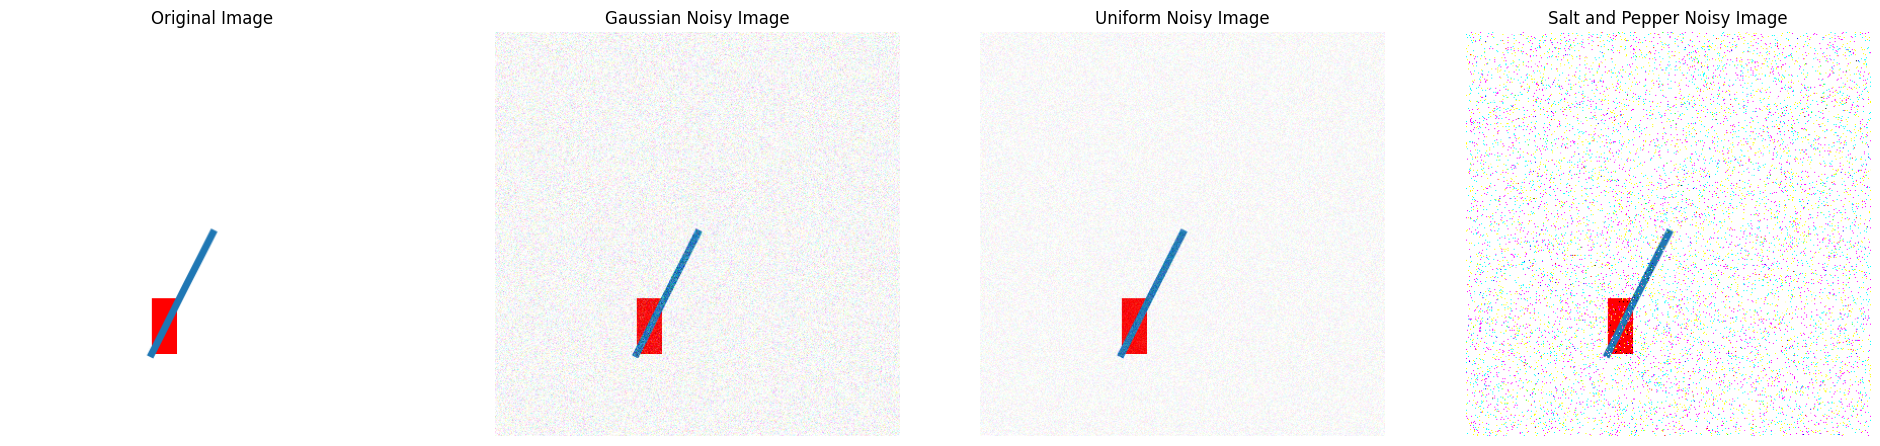

In [7]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# 加载图像
image = Image.open('/workspace/train_rect_left135_right135_temp.png')

# 定义图像转换
transform = transforms.Compose([
    transforms.ToTensor(),  # 转换为张量并归一化到 [0, 1] 范围
])

# 应用转换
image_tensor = transform(image)

# 添加高斯噪声
def add_gaussian_noise(image_tensor, mean=0.0, std=0.1):
    noise = torch.randn(image_tensor.size()) * std + mean
    noisy_image = image_tensor + noise
    noisy_image = torch.clamp(noisy_image, 0.0, 1.0)
    return noisy_image

# 添加均匀噪声
def add_uniform_noise(image_tensor, low=-0.1, high=0.1):
    noise = torch.rand(image_tensor.size()) * (high - low) + low
    noisy_image = image_tensor + noise
    noisy_image = torch.clamp(noisy_image, 0.0, 1.0)
    return noisy_image

# 添加椒盐噪声
def add_salt_and_pepper_noise(image_tensor, prob=0.05):
    # 创建一个与图像大小相同的随机数掩码
    noise = torch.rand(image_tensor.size())
    
    # 创建一个新的张量副本，以便不修改原始图像张量
    noisy_image = image_tensor.clone()
    
    # 将噪声概率小于 prob/2 的像素设置为 0（椒噪声）
    noisy_image[noise < (prob / 2)] = 0
    
    # 将噪声概率大于 1 - prob/2 的像素设置为 1（盐噪声）
    noisy_image[noise > 1 - (prob / 2)] = 1
    
    return noisy_image

# 将张量转换回图像
to_pil = transforms.ToPILImage()

# 原始图像
original_image = to_pil(image_tensor)

# 高斯噪声图像
gaussian_noisy_image_tensor = add_gaussian_noise(image_tensor)
gaussian_noisy_image = to_pil(gaussian_noisy_image_tensor)

# 均匀噪声图像
uniform_noisy_image_tensor = add_uniform_noise(image_tensor)
uniform_noisy_image = to_pil(uniform_noisy_image_tensor)

# 椒盐噪声图像
salt_and_pepper_noisy_image_tensor = add_salt_and_pepper_noise(image_tensor)
salt_and_pepper_noisy_image = to_pil(salt_and_pepper_noisy_image_tensor)

# 显示原始图像和加噪图像
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

axes[0].imshow(original_image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(gaussian_noisy_image)
axes[1].set_title('Gaussian Noisy Image')
axes[1].axis('off')

axes[2].imshow(uniform_noisy_image)
axes[2].set_title('Uniform Noisy Image')
axes[2].axis('off')

axes[3].imshow(salt_and_pepper_noisy_image)
axes[3].set_title('Salt and Pepper Noisy Image')
axes[3].axis('off')

plt.show()
